# 7136COMP - Project Dissertation

## AI assistant coach for analysing football players and teams using Machine Learning

### Scores and Fixtures Dataset:

In [1]:
# Common imports
import sklearn; print("version: ",sklearn.__version__) # to check the version

import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

# To plot figures
import matplotlib.pyplot as plt
# tells jupyter to set up Matplotlib so it uses Jupyter's own backend
%matplotlib inline 

# To save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=400):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

version:  0.24.2


## Dataset

In [2]:
# importing the dataset
score_data = pd.read_csv("./LFC_Data/2_Liv_Score_Fix_merge.csv")

In [3]:
# To take a quick look at the data structure
# Result = 0 for loss, 1 for draw and 2 for win
# Venue = 0 for home and 1 for away
score_data.head()

,season,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee
0,2017,12-08-2017,12:30,Matchweek 1,Sat,1,1,3,3,Watford,3.1,2.1,54,20407.0,Jordan Henderson,433,Anthony Taylor
1,2017,19-08-2017,15:00,Matchweek 2,Sat,0,2,1,0,Crystal Palace,2.4,0.6,71,53138.0,Jordan Henderson,433,Kevin Friend
2,2017,27-08-2017,16:00,Matchweek 3,Sun,0,2,4,0,Arsenal,3.0,0.7,49,53206.0,Jordan Henderson,433,Craig Pawson
3,2017,09-09-2017,12:30,Matchweek 4,Sat,1,0,0,5,Manchester City,0.7,2.7,35,54172.0,Jordan Henderson,433,Jonathan Moss
4,2017,16-09-2017,15:00,Matchweek 5,Sat,0,1,1,1,Burnley,2.1,0.6,72,53231.0,James Milner,433,Roger East


In [4]:
# To show the meaning of the features/columns
data_dict = pd.read_csv("./LFC_Data/2_Data_dictionary.csv")
data_dict

,Column Name,Description
0,season,Year where the data belongs to
1,Date,Date listed is local to the match
2,Time,Time listed is local to the match venue
3,Round,Round or Phase of competition
4,Day,Day of week
5,Venue,Home or Away match
6,Result,"Win, Draw or Loss"
7,GF,Goals For
8,GA,Goals Against
9,Opponent,Minutes played divided by 90


In [5]:
# To check the concise summary of the features
score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      190 non-null    int64  
 1   Date        190 non-null    object 
 2   Time        190 non-null    object 
 3   Round       190 non-null    object 
 4   Day         190 non-null    object 
 5   Venue       190 non-null    int64  
 6   Result      190 non-null    int64  
 7   GF          190 non-null    int64  
 8   GA          190 non-null    int64  
 9   Opponent    190 non-null    object 
 10  xG          190 non-null    float64
 11  xGA         190 non-null    float64
 12  Poss        190 non-null    int64  
 13  Attendance  149 non-null    float64
 14  Captain     190 non-null    object 
 15  Formation   190 non-null    int64  
 16  Referee     190 non-null    object 
dtypes: float64(3), int64(7), object(7)
memory usage: 25.4+ KB


In [6]:
# To generate the descriptive statistics 
score_data.describe()

,season,Venue,Result,GF,GA,xG,xGA,Poss,Attendance,Formation
count,190.00000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,149.000000,190.000000
mean,2019.00000,0.500000,1.584211,2.210526,0.847368,2.011053,0.970526,61.963158,44131.221477,910.663158
std,1.41795,0.501321,0.675155,1.417164,1.075395,0.888572,0.660347,9.445679,16390.722603,1259.919550
min,2017.00000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,34.000000,2000.000000,433.000000
25%,2018.00000,0.000000,1.000000,1.000000,0.000000,1.400000,0.500000,57.000000,31746.000000,433.000000
50%,2019.00000,0.500000,2.000000,2.000000,1.000000,1.950000,0.800000,63.000000,52951.000000,433.000000
75%,2020.00000,1.000000,2.000000,3.000000,1.000000,2.500000,1.300000,69.000000,53287.000000,433.000000
max,2021.00000,1.000000,2.000000,7.000000,7.000000,5.100000,3.900000,81.000000,80827.000000,4411.000000


In [7]:
# To check the distribution of the data
score_data["season"].value_counts()

2017    38
2018    38
2019    38
2020    38
2021    38
Name: season, dtype: int64

In [8]:
# To check the null value
score_data.isnull().sum()

season         0
Date           0
Time           0
Round          0
Day            0
Venue          0
Result         0
GF             0
GA             0
Opponent       0
xG             0
xGA            0
Poss           0
Attendance    41
Captain        0
Formation      0
Referee        0
dtype: int64

# Data Preprocessing
## EDA and Data Cleaning

In [9]:
# To check the shape of the data
score_data.shape

(190, 17)

In [10]:
# To fill the null values with 0 since due to covid fans were not allowed so there were
# no fans at the stadium
new_score_data = score_data.copy()

new_score_data['Attendance'].fillna(value=0, inplace=True)

In [11]:
# To check the null data again
new_score_data.isnull().sum()

season        0
Date          0
Time          0
Round         0
Day           0
Venue         0
Result        0
GF            0
GA            0
Opponent      0
xG            0
xGA           0
Poss          0
Attendance    0
Captain       0
Formation     0
Referee       0
dtype: int64

In [12]:
# To check the info of new_score_data
new_score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      190 non-null    int64  
 1   Date        190 non-null    object 
 2   Time        190 non-null    object 
 3   Round       190 non-null    object 
 4   Day         190 non-null    object 
 5   Venue       190 non-null    int64  
 6   Result      190 non-null    int64  
 7   GF          190 non-null    int64  
 8   GA          190 non-null    int64  
 9   Opponent    190 non-null    object 
 10  xG          190 non-null    float64
 11  xGA         190 non-null    float64
 12  Poss        190 non-null    int64  
 13  Attendance  190 non-null    float64
 14  Captain     190 non-null    object 
 15  Formation   190 non-null    int64  
 16  Referee     190 non-null    object 
dtypes: float64(3), int64(7), object(7)
memory usage: 25.4+ KB


Saving figure 02_hist_features


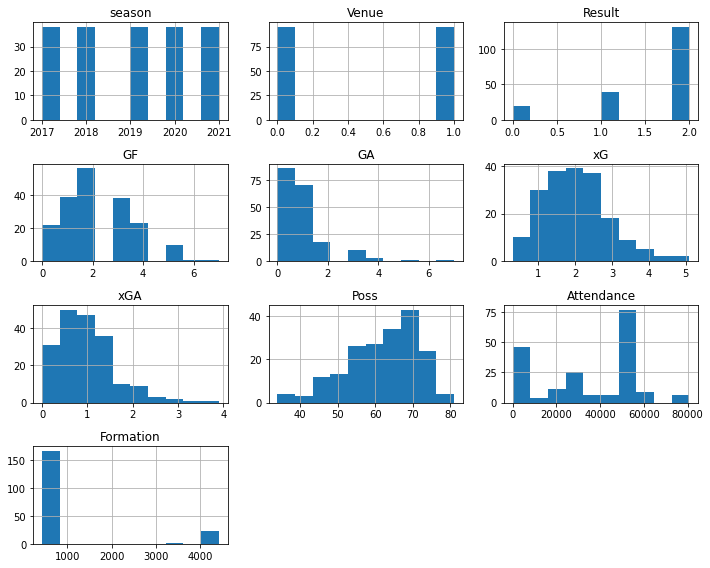

In [13]:
# To make histogram of all the features to analyse it
new_score_data.hist(figsize=(10,8))
save_fig("02_hist_features")
plt.show()

The above graph shows a lot of connections between different things. For example, most of the games that the team loses or ties are away matches, which means that the team does exceptionally well at home. It also shows that the team does well in terms of possession of the ball and a lot of other information.

In [14]:
new_score_data.head()

,season,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee
0,2017,12-08-2017,12:30,Matchweek 1,Sat,1,1,3,3,Watford,3.1,2.1,54,20407.0,Jordan Henderson,433,Anthony Taylor
1,2017,19-08-2017,15:00,Matchweek 2,Sat,0,2,1,0,Crystal Palace,2.4,0.6,71,53138.0,Jordan Henderson,433,Kevin Friend
2,2017,27-08-2017,16:00,Matchweek 3,Sun,0,2,4,0,Arsenal,3.0,0.7,49,53206.0,Jordan Henderson,433,Craig Pawson
3,2017,09-09-2017,12:30,Matchweek 4,Sat,1,0,0,5,Manchester City,0.7,2.7,35,54172.0,Jordan Henderson,433,Jonathan Moss
4,2017,16-09-2017,15:00,Matchweek 5,Sat,0,1,1,1,Burnley,2.1,0.6,72,53231.0,James Milner,433,Roger East


<AxesSubplot:xlabel='GF', ylabel='Opponent'>

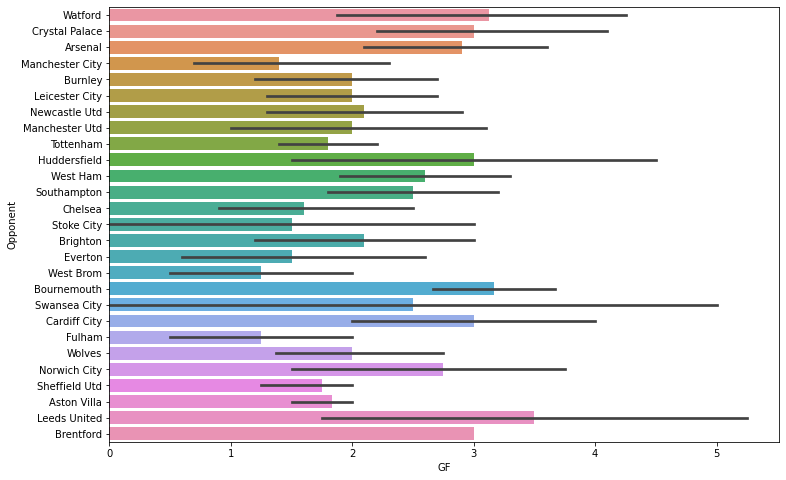

In [15]:
# To see against which club the team scored the most goals
plt.figure(figsize=(12,8))
sns.barplot(data=new_score_data, x='GF', y='Opponent')

According to the above barplot, the team scored the most against Leeds United and the least against Manchester City during the last five seasons. Fulham and West Brom are not last because they did not play all five seasons like Manchester City.

<AxesSubplot:xlabel='GA', ylabel='Opponent'>

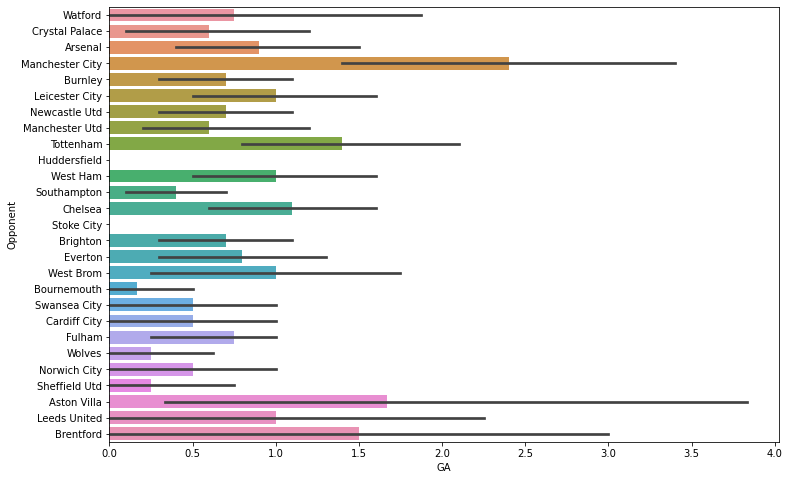

In [16]:
# To see against which club the team conceded the most goals
plt.figure(figsize=(12,8))
sns.barplot(data=new_score_data, x='GA', y='Opponent')

In the last five seasons, the team has given up the most goals against Manchester City and then Aston Villa. This means that the team needs to try new strategies or formations when playing against them because their usual plan is having difficulty to win against them.


<AxesSubplot:xlabel='count', ylabel='Opponent'>

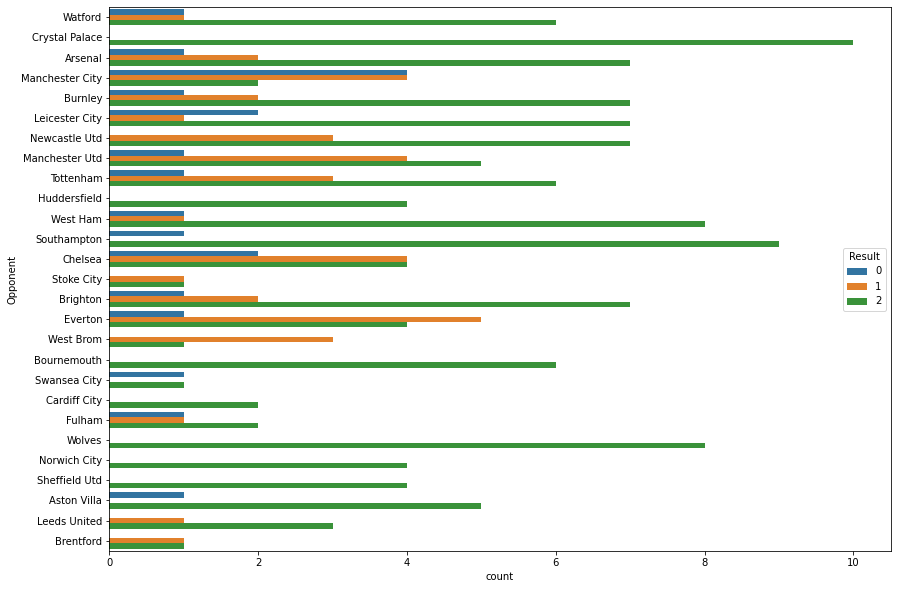

In [17]:
# To see against which club we have the best winning, draw and losing record
# 0 = loss
# 1 = draw
# 2 = win
plt.figure(figsize=(14, 10))
sns.countplot(data=new_score_data, y='Opponent', hue='Result')

From the above countplot, we can see that the team is most likely to win against Crystal Palace, most likely to draw against Everton (a local rival), and most likely to lose against Manchester City, which has been winning the league a lot in last 5 years.

Saving figure 02_result_count


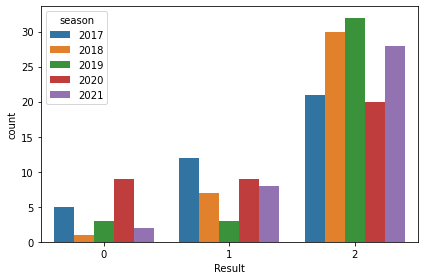

In [18]:
# To show the count plot of results according to the season 
sns.countplot(data=new_score_data, x='Result', hue='season')
save_fig("02_result_count")
plt.show()

It shows that in the last 5 years, the team did best in the 2019 season, when they won the most games and won the league, and that they did worst in the 2020 season, when there were no fans due to COVID.

<AxesSubplot:xlabel='Formation', ylabel='count'>

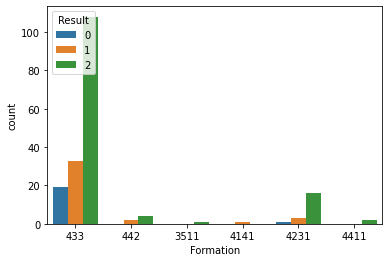

In [19]:
# To find out which formation is used most and what happens as a result
sns.countplot(data=new_score_data, x='Formation', hue='Result')

<AxesSubplot:xlabel='count', ylabel='Referee'>

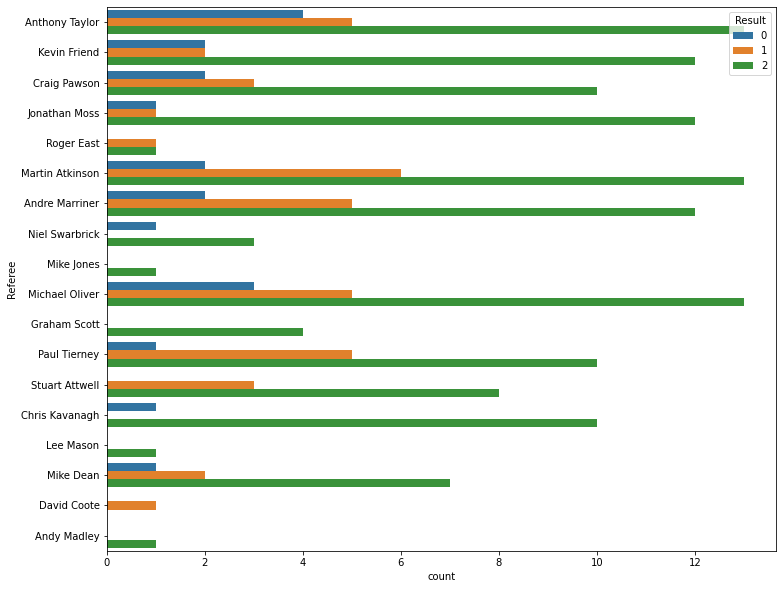

In [20]:
# To see the results according to the refree assigned during the match
plt.figure(figsize=(12,10))
sns.countplot(data=new_score_data, y='Referee', hue='Result')

<AxesSubplot:xlabel='GF', ylabel='Poss'>

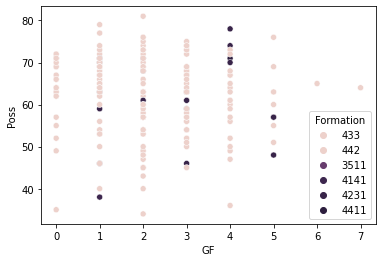

In [21]:
# To show the relation between goals scored and possesion as per the formation
sns.scatterplot(data=new_score_data, x='GF', y='Poss', hue='Formation')

Saving figure 02_seas_GF


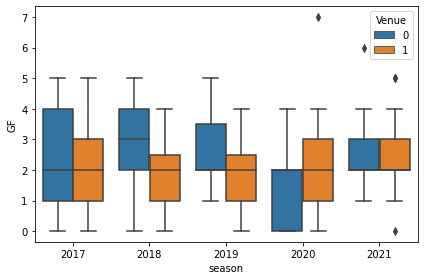

In [22]:
# To show the relation between season and goals scored according to the venue
# 0 = home match
# 1 = away match
sns.boxplot(data=new_score_data, x="season",y="GF", hue='Venue')
save_fig("02_seas_GF")

Based on the last 5 seasons, the above boxplot shows that the club scores more goals at home than in away matches.

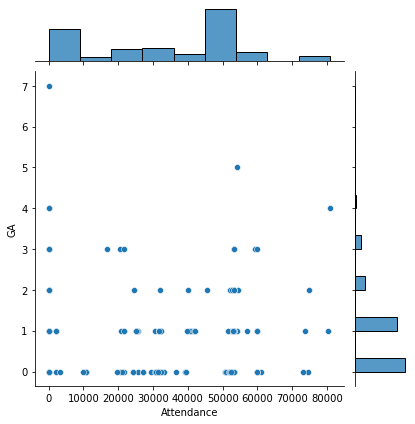

In [23]:
# To see the relation between number of fans and goals scored
sns.jointplot(x="Attendance", y="GA", data=new_score_data)    

# Feature Engineering

In [24]:
new_score_data.shape

(190, 17)

In [25]:
new_score_data.head()

,season,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee
0,2017,12-08-2017,12:30,Matchweek 1,Sat,1,1,3,3,Watford,3.1,2.1,54,20407.0,Jordan Henderson,433,Anthony Taylor
1,2017,19-08-2017,15:00,Matchweek 2,Sat,0,2,1,0,Crystal Palace,2.4,0.6,71,53138.0,Jordan Henderson,433,Kevin Friend
2,2017,27-08-2017,16:00,Matchweek 3,Sun,0,2,4,0,Arsenal,3.0,0.7,49,53206.0,Jordan Henderson,433,Craig Pawson
3,2017,09-09-2017,12:30,Matchweek 4,Sat,1,0,0,5,Manchester City,0.7,2.7,35,54172.0,Jordan Henderson,433,Jonathan Moss
4,2017,16-09-2017,15:00,Matchweek 5,Sat,0,1,1,1,Burnley,2.1,0.6,72,53231.0,James Milner,433,Roger East


In [26]:
# To see the correlation between the features using correlation matrix
corr_data = new_score_data.corr()
corr_data

,season,Venue,Result,GF,GA,xG,xGA,Poss,Attendance,Formation
season,1.000000e+00,-3.305458e-18,0.011054,-0.002633,-0.013879,0.126401,0.083066,0.082564,-0.274118,-0.255887
Venue,-3.305458e-18,1.000000e+00,-0.164138,-0.148947,0.152120,-0.225081,0.223758,-0.149166,-0.251022,-0.068455
Result,1.105360e-02,-1.641377e-01,1.000000,0.617308,-0.539682,0.408105,-0.355178,0.032431,0.154747,0.093421
GF,-2.633038e-03,-1.489471e-01,0.617308,1.000000,-0.089900,0.527137,-0.151077,-0.060288,0.109349,0.096492
GA,-1.387935e-02,1.521199e-01,-0.539682,-0.089900,1.000000,-0.205311,0.647805,-0.229222,-0.102990,-0.035668
xG,1.264012e-01,-2.250811e-01,0.408105,0.527137,-0.205311,1.000000,-0.222799,0.133062,0.107511,0.037909
xGA,8.306586e-02,2.237578e-01,-0.355178,-0.151077,0.647805,-0.222799,1.000000,-0.357296,-0.198328,-0.046154
Poss,8.256394e-02,-1.491662e-01,0.032431,-0.060288,-0.229222,0.133062,-0.357296,1.000000,-0.065119,-0.003523
Attendance,-2.741178e-01,-2.510220e-01,0.154747,0.109349,-0.102990,0.107511,-0.198328,-0.065119,1.000000,0.110493
Formation,-2.558870e-01,-6.845542e-02,0.093421,0.096492,-0.035668,0.037909,-0.046154,-0.003523,0.110493,1.000000


Saving figure 02_corr_heatmap


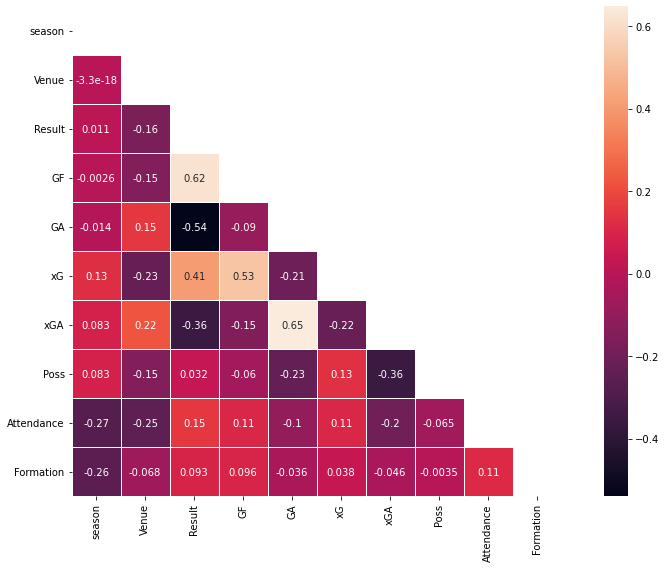

In [27]:
# To visualize in a better way
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(corr_data, dtype=np.bool))
sns.heatmap(corr_data, mask=mask, linewidths=.5, annot=True, square=True)
save_fig("02_corr_heatmap")

Since, there is not much correlation between the variables, I'm gonna keep all of the features for training.

## K-Means Clustering without PCA

This is the most often used clustering approach. In each iteration, it uses the Euclidean distance between clusters to determine which data point belongs to which cluster and then proceeds appropriately. Several strategies can be used to determine how many clusters to consider. Elbow Curve is the most basic and regularly used approach.

In [28]:
new_score_data.shape

(190, 17)

In [29]:
# Creating new copy of data for doing the cluster operation
clus_data = new_score_data.copy()

# To remove the unwanted features from the dataset
clus_data.drop(['Date','Time','Round','Day','Opponent','Captain','Referee'], axis=1, inplace=True)

In [30]:
clus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      190 non-null    int64  
 1   Venue       190 non-null    int64  
 2   Result      190 non-null    int64  
 3   GF          190 non-null    int64  
 4   GA          190 non-null    int64  
 5   xG          190 non-null    float64
 6   xGA         190 non-null    float64
 7   Poss        190 non-null    int64  
 8   Attendance  190 non-null    float64
 9   Formation   190 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 15.0 KB


In [31]:
# To standardize the data first and then use the scaled data for all clustering work
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_data = sc.fit_transform(clus_data)

In [32]:
# To see the scaled data after standarizing
df_scaled_data = pd.DataFrame(scaled_data)
col_list = list(clus_data.columns)
df_scaled_data.columns = col_list
df_scaled_data.head()

,season,Venue,Result,GF,GA,xG,xGA,Poss,Attendance,Formation
0,-1.414214,1.0,-0.867585,0.558552,2.007001,1.228741,1.714944,-0.845275,-0.611776,-0.380124
1,-1.414214,-1.0,0.617470,-0.856446,-0.790042,0.438878,-0.562591,0.959245,0.798252,-0.380124
2,-1.414214,-1.0,0.617470,1.266051,-0.790042,1.115903,-0.410755,-1.376016,0.801181,-0.380124
3,-1.414214,1.0,-2.352640,-1.563945,3.871696,-1.479359,2.625958,-2.862091,0.842796,-0.380124
4,-1.414214,-1.0,-0.867585,-0.856446,0.142306,0.100366,-0.562591,1.065393,0.802258,-0.380124


In [33]:
# To calculate the inertia using KMeans for plotting elbow curve
from sklearn.cluster import KMeans

kmeans_clus = [KMeans(n_clusters=i, random_state=42).fit(df_scaled_data) for i in range(1,11)]
inertia = [mod.inertia_ for mod in kmeans_clus]

Inertia is the sum of squares within a cluster. It is a measurement that shows how well the clusters work together. Inertia assumes that clusters are convex and isotropic. It doesn't work well for long clusters or manifolds with odd shapes, so hierarchical clustering is a better choice here. Inertia also doesn't work well in spaces with a lot of dimensions because Euclidean distances between points are inflated and no normalisation is done first; they are not a standardised metric.

In [34]:
# To see the value of the inertia
inertia

[1900.0000000000002,
 1559.623652660714,
 1381.9621477044655,
 1240.8142100760338,
 1109.1730806784242,
 1026.382430742294,
 959.4148050690612,
 909.5765433269586,
 867.3088251954897,
 822.5829242041149]

Saving figure 02_Elbow_point


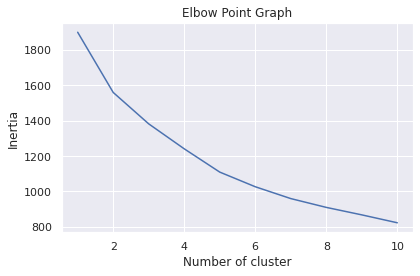

In [195]:
# To plot the elbow curve for knowing the optimal number of clusters
sns.set()
plt.plot(range(1,11), inertia)
plt.title('Elbow Point Graph')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
save_fig("02_Elbow_point")
plt.show()

In [36]:
# To check silhouette score
from sklearn.metrics import silhouette_score

sil_scores = [silhouette_score(df_scaled_data, model.labels_) for model in kmeans_clus[1:]]
sil_scores

[0.17838649719762445,
 0.1883307677068556,
 0.15852618367067825,
 0.1703130363083315,
 0.16779383378108975,
 0.1801825057368513,
 0.16710430684489336,
 0.17109001653574835,
 0.17672562677506243]

Saving figure 02_Sil_score


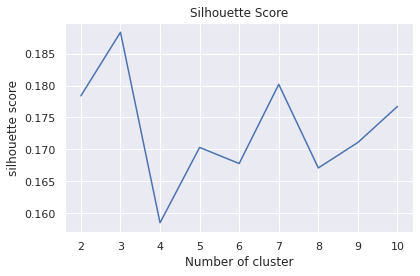

In [196]:
# To show the graphical way of silhoutte score
plt.plot(range(2,11), sil_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of cluster')
plt.ylabel('silhouette score')
save_fig("02_Sil_score")
plt.show()

When you plot every instance's silhouette coefficient, sorted by the cluster they belong to and by the value of the coefficient, you get an even more informative picture.

When you plot the silhouette coefficient of each instance, ordered by cluster and coefficient value, you get an even more interesting visualisation. This is known as a silhouette diagram:

Saving figure 02_sil_diag


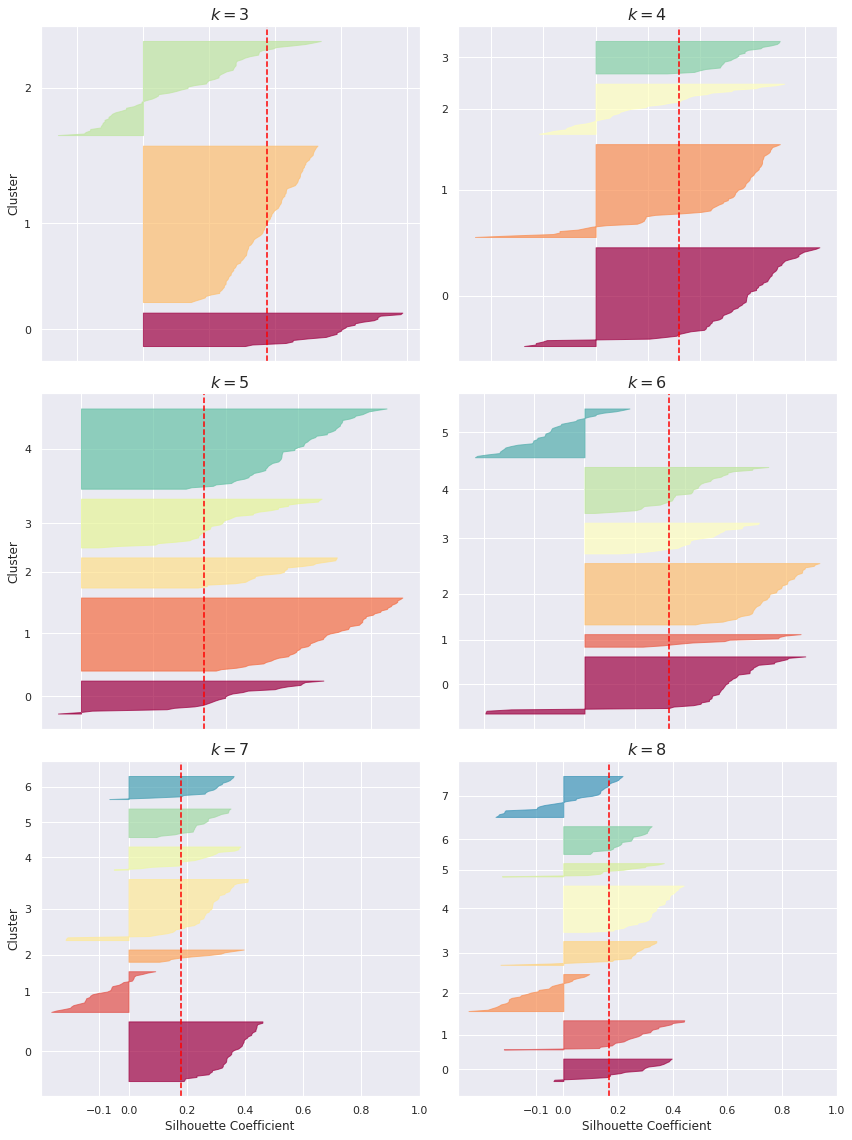

In [197]:
# To plot the silhouette diagram
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

import matplotlib as mpl

plt.figure(figsize=(12,16))

for i in (3,4,5,6,7,8):
    plt.subplot(3,2,i-2)
    
    y_pred = kmeans_clus[i-1].labels_
    sil_coeff = silhouette_samples(df_scaled_data, y_pred)
    
    padding = len(df_scaled_data)//30
    posit = padding
    ticks = []
    for j in range(i):
        coeffs = sil_coeff[y_pred == j]
        coeffs.sort()
        
        color = mpl.cm.Spectral(j / i)
        plt.fill_betweenx(np.arange(posit, posit + len(coeffs)), 0, coeffs, facecolor=color, edgecolor=color, alpha=0.7)
        
        ticks.append(posit+len(coeffs)//2)
        posit+=len(coeffs) + padding
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(i)))
    
    if i in (3,5,7):
        plt.ylabel("Cluster")
        
    if i in (7,8):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
        
    else:
        plt.tick_params(labelbottom=False)
    
    plt.axvline(x=sil_scores[i - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(i), fontsize=16)
save_fig('02_sil_diag')
plt.show()

For n_clusters=5, all the plots are more or less of similar thickness and hence are of similar sizes, as can be considered as best number of cluster.

Silhouette analysis can be used to study the separation distance between the resulting clusters and can be considered a better method compared to the Elbow method.

In [39]:
# Running K means in 5 clusters 
kmeans_5 = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_5.fit(df_scaled_data)

# predictions for new data
pred = kmeans_5.predict(df_scaled_data)

# To check the centers of the cluster
print(kmeans_5.cluster_centers_)

[[ 0.08838835  0.58333333 -1.05321661 -0.23738448  1.69621838 -0.59546519
   1.77820879 -1.00007449 -0.43302041 -0.25418849]
 [ 0.10878566 -0.96153846  0.58891147  0.54494598 -0.3776574   0.70795244
  -0.42243511  0.13863731  0.64365515 -0.3801236 ]
 [-0.70710678 -0.27272727  0.41496273  0.39775653 -0.11197093  0.12601086
  -0.11398572  0.01356056  0.40716829  2.62604118]
 [-0.16162441 -0.02857143 -1.41917658 -1.20008828  0.06239018 -0.66692893
  -0.2328908   0.4345692  -0.1325905  -0.29335883]
 [ 0.23570226  0.75438596  0.61747022  0.18618391 -0.36476056 -0.03424717
  -0.17634248  0.02253322 -0.48060724 -0.37962099]]


In [40]:
# To return label for each data point based on their cluster
print(kmeans_5.labels_)

[0 1 1 0 3 0 3 3 0 1 4 1 3 2 2 3 3 4 2 1 1 2 0 3 4 0 4 1 1 3 1 4 3 1 0 3 3
 2 1 4 1 4 4 2 0 3 4 2 2 2 2 2 4 4 2 2 2 2 3 2 2 2 3 1 3 1 3 1 4 1 4 1 4 1
 4 1 1 4 1 4 1 4 4 1 3 1 4 1 4 1 2 4 2 4 2 1 4 1 4 4 1 4 1 0 1 3 1 0 4 4 3
 3 0 4 1 4 1 0 0 2 4 0 1 0 4 3 4 4 3 3 3 3 3 4 4 3 0 0 3 4 3 3 4 4 4 0 3 4
 0 4 4 4 4 1 1 4 1 0 0 4 1 3 3 1 1 4 4 1 1 0 3 0 1 4 1 4 1 1 1 4 4 1 0 1 1
 4 3 4 4 1]


In [41]:
# To see the number of instances belong to different cluster
pd.Series(kmeans_5.labels_).value_counts()

4    57
1    52
3    35
0    24
2    22
dtype: int64

In [42]:
# To add new column which is KM_Clusters value in scaled data
pred = kmeans_5.labels_
df_cluster_data = pd.DataFrame(df_scaled_data)
df_cluster_data['KM_Clusters'] = pred
df_cluster_data.head()

,season,Venue,Result,GF,GA,xG,xGA,Poss,Attendance,Formation,KM_Clusters
0,-1.414214,1.0,-0.867585,0.558552,2.007001,1.228741,1.714944,-0.845275,-0.611776,-0.380124,0
1,-1.414214,-1.0,0.617470,-0.856446,-0.790042,0.438878,-0.562591,0.959245,0.798252,-0.380124,1
2,-1.414214,-1.0,0.617470,1.266051,-0.790042,1.115903,-0.410755,-1.376016,0.801181,-0.380124,1
3,-1.414214,1.0,-2.352640,-1.563945,3.871696,-1.479359,2.625958,-2.862091,0.842796,-0.380124,0
4,-1.414214,-1.0,-0.867585,-0.856446,0.142306,0.100366,-0.562591,1.065393,0.802258,-0.380124,3


In [43]:
# To add KM_Clusters column in the original data
pred = kmeans_5.labels_
df_updated_data = pd.DataFrame(new_score_data)
df_updated_data['KM_Clusters'] = pred
df_updated_data.head()

,season,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,KM_Clusters
0,2017,12-08-2017,12:30,Matchweek 1,Sat,1,1,3,3,Watford,3.1,2.1,54,20407.0,Jordan Henderson,433,Anthony Taylor,0
1,2017,19-08-2017,15:00,Matchweek 2,Sat,0,2,1,0,Crystal Palace,2.4,0.6,71,53138.0,Jordan Henderson,433,Kevin Friend,1
2,2017,27-08-2017,16:00,Matchweek 3,Sun,0,2,4,0,Arsenal,3.0,0.7,49,53206.0,Jordan Henderson,433,Craig Pawson,1
3,2017,09-09-2017,12:30,Matchweek 4,Sat,1,0,0,5,Manchester City,0.7,2.7,35,54172.0,Jordan Henderson,433,Jonathan Moss,0
4,2017,16-09-2017,15:00,Matchweek 5,Sat,0,1,1,1,Burnley,2.1,0.6,72,53231.0,James Milner,433,Roger East,3


Saving figure 02_count_kmeans


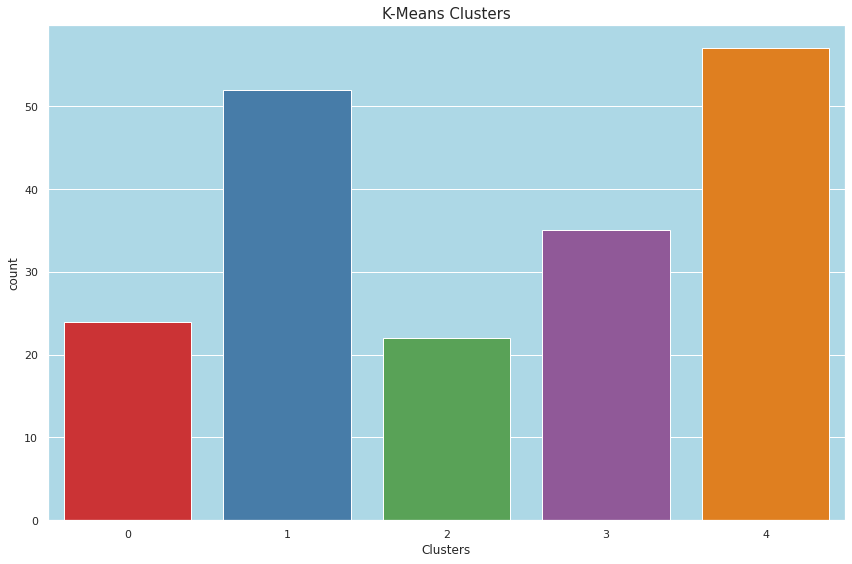

In [90]:
# To plot the counplot of different clusters
plt.rcParams['axes.facecolor'] = 'lightblue'
plt.figure(figsize=(12,8))
sns.countplot(x=df_updated_data['KM_Clusters'], data=df_updated_data, palette='Set1')
plt.title("K-Means Clusters", fontsize=15)
plt.xlabel("Clusters", fontsize=12)
plt.rcParams['axes.facecolor'] = 'lightblue'
save_fig("02_count_kmeans")
plt.show()

# Using PCA to visualise and improve results

PCA (Principal Component Analysis) is a basic way to reduce the number of dimensions by combining features in X in linear ways so that each new component captures the most information or variation in the data. Most of the time, n components is small, like 3, and can be used for data visualisation, data compression, and exploratory analysis.

I'll standardise the data using Scikit-StandardScaler Learn's class before fitting a PCA model to it.

In [48]:
# To drop the unwanted features that adds nothing to the information
updated_data = new_score_data.copy()
updated_data.drop(['Date','Time','Round','Day','Opponent','Captain','Referee','KM_Clusters'], axis=1, inplace=True)
updated_data.head()

,season,Venue,Result,GF,GA,xG,xGA,Poss,Attendance,Formation
0,2017,1,1,3,3,3.1,2.1,54,20407.0,433
1,2017,0,2,1,0,2.4,0.6,71,53138.0,433
2,2017,0,2,4,0,3.0,0.7,49,53206.0,433
3,2017,1,0,0,5,0.7,2.7,35,54172.0,433
4,2017,0,1,1,1,2.1,0.6,72,53231.0,433


In [49]:
# To check the updated data shape
updated_data.shape

(190, 10)

In [52]:
# To standarise the data
pca_scaler = StandardScaler()
pca_scaled_data = pca_scaler.fit_transform(updated_data)

In [53]:
# To perform the PCA 
from sklearn.decomposition import PCA

# 0.95 to check how many principal components make a variance of 95%.
pca = PCA(n_components=0.95)
components = pca.fit(pca_scaled_data).transform(pca_scaled_data)
print('Total no. of principal components =',pca.n_components_)

Total no. of principal components = 9


In [54]:
# To check the shape of the components
components.shape

(190, 9)

Text(0, 0.5, 'Explained Variance Ratio')

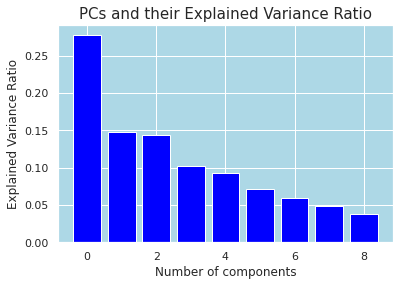

In [55]:
# Plot to explained variance ratio for each PC (Principal Component)
var = pca.explained_variance_ratio_

plt.bar([i for i, _ in enumerate(var)],var,color='blue')
plt.title('PCs and their Explained Variance Ratio', fontsize=15)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Explained Variance Ratio',fontsize=12)

Typically, we want the explained variance to be between 95-99%. Therefore, for that to achieve total number of components should be 9.

In [56]:
# Percentage of variance explained for each components
print("Explained variance ratio: %s" % str(pca.explained_variance_ratio_))

Explained variance ratio: [0.27751961 0.14721759 0.14313723 0.10226572 0.09268874 0.0717168
 0.05987401 0.0490762  0.03831174]


In [57]:
# Cumulative Variance explained by each PC
cumulative_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(cumulative_var)

[27.75 42.47 56.78 67.01 76.28 83.45 89.44 94.35 98.18]


Text(0, 0.5, 'Cumulative Explained Variance Ratio')

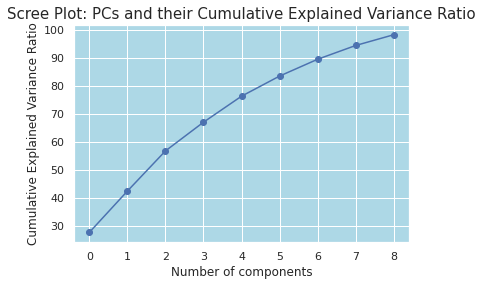

In [58]:
# To plot the relation between number of components and variance
plt.plot(cumulative_var, marker='o')
plt.title('Scree Plot: PCs and their Cumulative Explained Variance Ratio',fontsize=15)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Cumulative Explained Variance Ratio',fontsize=12)

In [59]:
# To show PC (Principal Component) data decomposition
col_names = list(updated_data.columns)
pca_data = pd.DataFrame({ 'Features':col_names,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                          'PC4':pca.components_[3],'PC5':pca.components_[4], 'PC6':pca.components_[5], 'PC7':pca.components_[6], 
                          'PC8':pca.components_[7], 'PC9':pca.components_[8]})
pca_data

,Features,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,season,0.023492,-0.510851,0.412998,-0.193285,-0.001951,0.460746,-0.502812,-0.173240,-0.188225
1,Venue,0.257779,-0.062027,0.122799,0.719583,-0.048858,-0.417370,-0.468258,-0.011326,-0.028835
2,Result,-0.474733,0.070290,0.225110,0.284502,-0.121855,0.128160,0.118783,-0.401934,0.317328
3,GF,-0.367209,0.249208,0.479198,0.048827,0.084803,-0.206038,0.168640,-0.288363,-0.409461
4,GA,0.417806,0.261799,0.251615,-0.331849,0.206708,-0.281362,0.009903,-0.153508,-0.343573
5,xG,-0.377442,0.015098,0.373021,-0.209616,0.191206,-0.285857,-0.230060,0.651441,0.258524
6,xGA,0.419719,0.223012,0.362667,-0.120678,0.097734,0.056536,0.011492,-0.231318,0.687435
7,Poss,-0.176043,-0.449510,-0.289494,-0.200294,0.468950,-0.460606,-0.060986,-0.414472,0.180723
8,Attendance,-0.197688,0.421428,-0.273850,-0.336071,-0.414471,-0.131365,-0.590362,-0.227778,0.045434
9,Formation,-0.097593,0.412282,-0.203140,0.199570,0.703582,0.401434,-0.282776,0.006145,-0.056711


In [60]:
pca_data.shape

(10, 10)

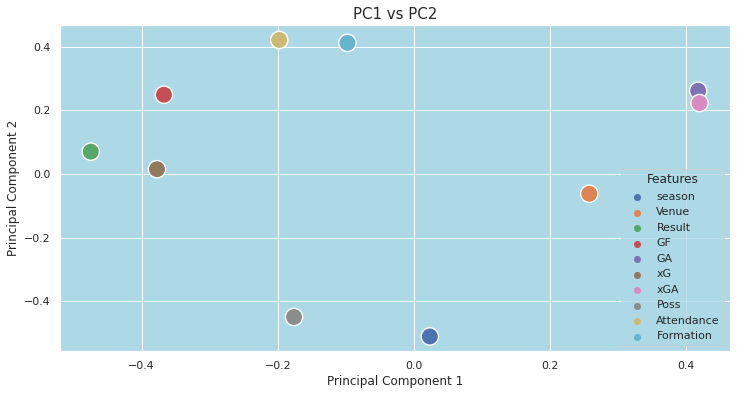

In [61]:
# To visualise the 2 main PCs
fig = plt.figure(figsize = (12,6))
sns.scatterplot(pca_data.PC1, pca_data.PC2, hue=pca_data.Features, marker='o', s=300)
plt.title('PC1 vs PC2',fontsize=15)
plt.xlabel('Principal Component 1',fontsize=12)
plt.ylabel('Principal Component 2',fontsize=12)
plt.show()

It can be noticed that the first Principal Component (X-axis) is primarily drawn to features such as Venue, GA, and xGA. The 2nd Principal Component (Y-axis) is mostly drawn to features such as Attendance and Formation.

In [62]:
# To run the KMeans again after performing PCA
pca_kmeans_5 = KMeans(n_clusters=5, init='k-means++', random_state=42)
pca_kmeans_5.fit(pca_scaled_data)

# predictions for pca scaled data
y_num = pca_kmeans_5.predict(pca_scaled_data)

Explained variance ration (first two components): [0.27751961 0.14721759]
Saving figure 02_PCA_2_Items


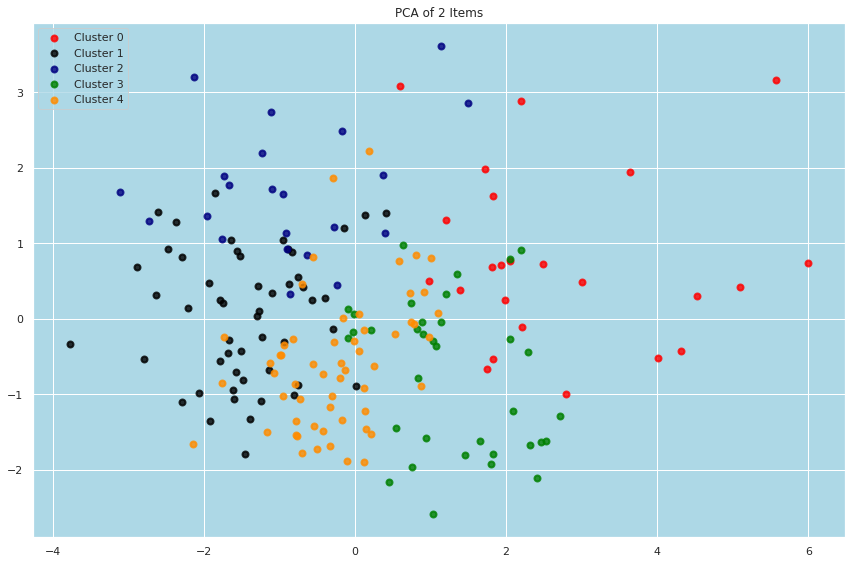

In [63]:
# To visualise the data after running PCA
targets = ['Cluster 0','Cluster 1','Cluster 2','Cluster 3','Cluster 4']

# Number of components is equal to 2 so that I can visualise the data
pca = PCA(n_components=2, random_state=42)
X_r = pca.fit(pca_scaled_data).transform(pca_scaled_data)

# To show the percentage of variance for each component
print('Explained variance ration (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure(figsize=(12,8))
colors = ['red','black','navy','green','darkorange']
lw = 2

for color, i, target in zip(colors, [0,1,2,3,4], targets):
    plt.scatter(x=X_r[y_num==i,0], y=X_r[y_num==i,1], color=color, alpha=.8, lw=lw, label=target)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of 2 Items')
save_fig("02_PCA_2_Items")
plt.show()

We can see, the variance explained by first and second principal components are nearly 28% and 15% respectively. We can now count cumulative variance explained by them. For convenience of observation, we are converting the figures to percentages here.

In [64]:
# Running PCA again with total 9 components which was selected above
pca = PCA(n_components=9, random_state=42)
X = pca.fit(pca_scaled_data).transform(pca_scaled_data)

wcss2 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    
    wcss2.append(kmeans.inertia_)

Saving figure 02_Elbow_point2


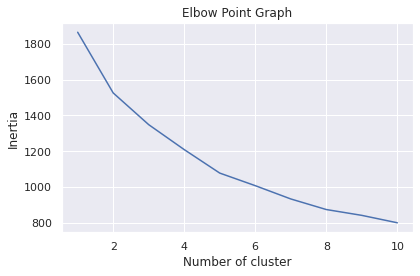

In [65]:
# To check the updated elbow point graph
sns.set()
plt.plot(range(1,11), wcss2)
plt.title('Elbow Point Graph')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
save_fig("02_Elbow_point2")
plt.show()

In [66]:
# To check the updated value of inertia for clusters after PCA
wcss2

[1865.4345059335346,
 1525.6617682499839,
 1348.1047196296495,
 1208.4880276656734,
 1077.0572075642942,
 1006.616572542791,
 932.2902954302908,
 873.0042852310919,
 840.3826194268149,
 798.8760806863494]

In conclusion, it can be seen that PCA managed to improve our results by reducing inertia for clustering.

Saving figure 02_KM_cluster


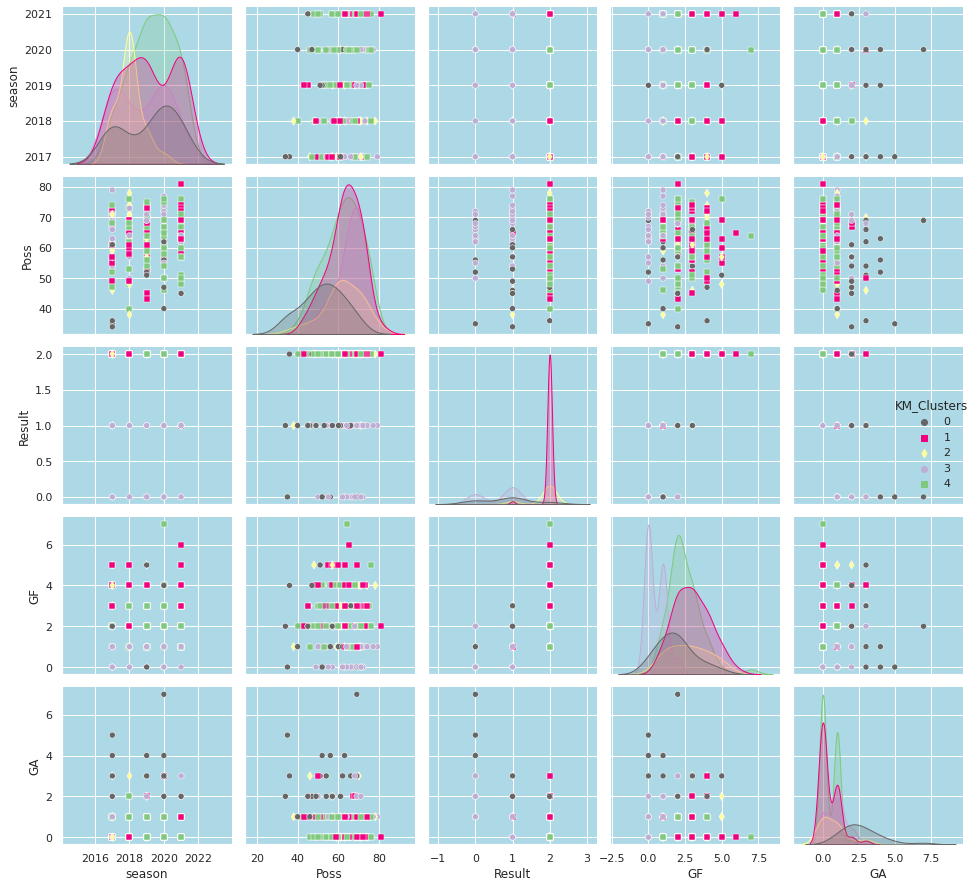

In [95]:
# To plot the clusterting distribution of all the important features
sns.pairplot(data=df_updated_data, x_vars=['season','Poss','Result','GF','GA'],
             y_vars=['season','Poss','Result','GF','GA'], hue='KM_Clusters', 
             palette='Accent_r', markers=['o','s','d','o','s'])
save_fig("02_KM_cluster")

Let us determine the common qualities that players share with each cluster in K-Means Clustering using the pairplot above:

Cluster 0 traits:
- Players in this cluster have played most of the seasons
- Players in this cluster had possession of the ball between 35% and 70% of the time during the matches
- Players in this cluster drew or lost their matches most of the time 
- Players in this cluster were able to score an average 1 or 2 goals as a team in most of the matches
- Players in this cluster conceded an average 2 or 3 goals as a team in most of the matches

Cluster 1 traits:
- Players in this cluster have played most of the seasons
- Players in this cluster had possession of the ball between 40% and 80% most of the time during the matches
- Players in this cluster won their matches most of the time 
- Players in this cluster were able to score an average 2 or 3 goals as a team in most of the matches
- Players in this cluster conceded an average 1 goal as a team in most of the matches

Cluster 2 traits:
- Players in this cluster have played seasons before 2019
- Players in this cluster had possession of the ball between 35% and 80% of the time during the matches
- Players in this cluster won their matches most of the time and had drew few times 
- Players in this cluster were able to score an average between 1 and 3 goals as a team in most of the matches
- Players in this cluster conceded an average between 0 and 2 goals as a team in most of the matches

Cluster 3 traits:
- Players in this cluster have played most of the seasons
- Players in this cluster had possession of the ball between 50% and 80% of the time during the matches
- Players in this cluster either drew or lost their matches most of the time
- Players in this cluster were able to score an average 1 goal as a team in most of the matches
- Players in this cluster conceded an average less than 2 goals as a team in most of the matches

Cluster 4 traits:
- Players in this cluster have played most of the seasons
- Players in this cluster had possession of the ball between 40% and 80% of the time during the matches
- Players in this cluster won their matches most of the time
- Players in this cluster were able to score an average 2 or 3 goals as a team in most of the matches
- Players in this cluster conceded an average 1 goal as a team in most of the matches

In [69]:
# Exporting clustering results
new_score_data.to_csv("02_KM_clustering_results.csv", index=False)

# Using DBSCAN 

DBSCAN is a density-based spatial clustering method. It sees clusters as high-density areas separated by low-density areas. Unlike K Means, which focuses on locating centroids and associating data points with that centroid in a spherical fashion, the DBSCAN algorithm may locate clusters of any convex form. DBSCAN is also resistant to low-density areas. DBSCAN, unlike k-means, will determine the number of clusters.

Here, I try to remove as many anomalies as possible so that the model has the right number of clusters.

In [70]:
df_check_data = pd.DataFrame(pca_scaled_data)
col_li = list(updated_data.columns)
df_check_data.columns = col_li
df_check_data.head()

,season,Venue,Result,GF,GA,xG,xGA,Poss,Attendance,Formation
0,-1.414214,1.0,-0.867585,0.558552,2.007001,1.228741,1.714944,-0.845275,-0.611776,-0.380124
1,-1.414214,-1.0,0.617470,-0.856446,-0.790042,0.438878,-0.562591,0.959245,0.798252,-0.380124
2,-1.414214,-1.0,0.617470,1.266051,-0.790042,1.115903,-0.410755,-1.376016,0.801181,-0.380124
3,-1.414214,1.0,-2.352640,-1.563945,3.871696,-1.479359,2.625958,-2.862091,0.842796,-0.380124
4,-1.414214,-1.0,-0.867585,-0.856446,0.142306,0.100366,-0.562591,1.065393,0.802258,-0.380124


In [186]:
# min points = 2 because larger values is for large data, noisy data or data that containse many duplicates
from sklearn.cluster import DBSCAN

# a minimum minPts can be derived from the number of dimensions D in the data set, as minPts = D + 1. 
# The low value minPts = 1 does not make sense, as then every point on its own will already be a cluster. 
# With minPts = 2, the result will be the same as of hierarchical clustering with the single link metric, 
# with the dendrogram cut at height e. Therefore, minPts must be chosen at least 3.
dbs = DBSCAN(eps=2, min_samples=4)

# Where -1 indicates they are the outliers (do not fall in any clusters)
dbs_model = dbs.fit(pca_scaled_data)
labels = dbs_model.labels_
labels

array([-1,  0,  0, -1,  0, -1,  1,  0, -1,  0, -1,  0,  0,  2, -1,  0,  0,
        1, -1,  0,  0,  2, -1, -1,  1, -1,  1,  0,  0,  1,  0,  1,  1,  0,
        1,  0,  1,  3,  0,  1,  0,  1, -1,  3,  1, -1,  1,  3, -1,  3,  2,
        3,  1,  1,  3,  2,  3, -1, -1,  2, -1, -1,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1,  0,  1,  0,  0,  1,  0,  1,  0,  1,  1,  0,  1,
        0,  1,  0,  1,  0, -1,  1,  3,  1,  3,  0,  1,  0,  1,  1,  0,  1,
        0, -1,  0, -1, -1, -1,  4,  1,  4, -1, -1,  1, -1,  1,  4, -1, -1,
       -1,  4, -1,  4, -1,  4, -1,  4, -1,  4, -1, -1,  4,  4,  1,  1,  4,
       -1, -1,  4,  1,  4,  4,  1,  1,  4, -1,  4,  4,  1,  1,  1,  4,  1,
        0,  0, -1,  0, -1,  0, -1, -1,  0, -1,  0,  0,  1,  1,  0,  0, -1,
       -1, -1,  0,  1,  0,  1,  0, -1,  0,  1, -1,  0, -1,  0,  0,  1,  0,
        1,  1,  0])

In [187]:
# identifying the points which makes up core points
cores = np.zeros_like(labels, dtype=bool)
cores[dbs.core_sample_indices_] = True

# calculating the number of clusters
dbs_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters are: ", dbs_clusters)

Number of clusters are:  5


In [188]:
# to calculate silhouetter score
print(silhouette_score(pca_scaled_data, labels))

0.11018361890840705


In [189]:
# To see the the amount of data divided into clusters
pd.Series(dbs_model.labels_).value_counts()

 0    55
 1    55
-1    48
 4    18
 3     9
 2     5
dtype: int64

It can be seen that 57.89% of data points have been labelled to the first two clusters.

In [150]:
# To save the cluster labels and sort by cluster
data_copy = new_score_data.copy()
data_copy = data_copy.drop('KM_Clusters', axis=1)
data_copy['DB_clusters'] = dbs.labels_

In [151]:
# To review the cluster centers
data_copy.groupby('DB_clusters').mean()

,season,Venue,Result,GF,GA,xG,xGA,Poss,Attendance,Formation
DB_clusters,,,,,,,,,,
-1,2019.166667,0.729167,1.104167,2.270833,1.791667,1.927083,1.481250,57.104167,29922.812500,1207.562500
0,2018.909091,0.000000,1.818182,2.509091,0.490909,2.341818,0.687273,63.509091,53241.545455,433.163636
1,2018.927273,1.000000,1.781818,2.054545,0.581818,1.820000,0.869091,62.236364,28881.363636,433.490909
2,2017.600000,1.000000,2.000000,2.200000,0.200000,1.600000,0.740000,62.000000,26751.800000,4231.000000
3,2018.111111,0.000000,2.000000,2.666667,0.222222,2.333333,0.688889,67.555556,52537.444444,4271.000000
4,2019.888889,0.000000,1.222222,1.388889,0.722222,1.761111,0.988889,66.555556,883.388889,433.500000


In [152]:
data_copy.head()

,season,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,DB_clusters
0,2017,12-08-2017,12:30,Matchweek 1,Sat,1,1,3,3,Watford,3.1,2.1,54,20407.0,Jordan Henderson,433,Anthony Taylor,-1
1,2017,19-08-2017,15:00,Matchweek 2,Sat,0,2,1,0,Crystal Palace,2.4,0.6,71,53138.0,Jordan Henderson,433,Kevin Friend,0
2,2017,27-08-2017,16:00,Matchweek 3,Sun,0,2,4,0,Arsenal,3.0,0.7,49,53206.0,Jordan Henderson,433,Craig Pawson,0
3,2017,09-09-2017,12:30,Matchweek 4,Sat,1,0,0,5,Manchester City,0.7,2.7,35,54172.0,Jordan Henderson,433,Jonathan Moss,-1
4,2017,16-09-2017,15:00,Matchweek 5,Sat,0,1,1,1,Burnley,2.1,0.6,72,53231.0,James Milner,433,Roger East,0


Saving figure 02_DB_cluster


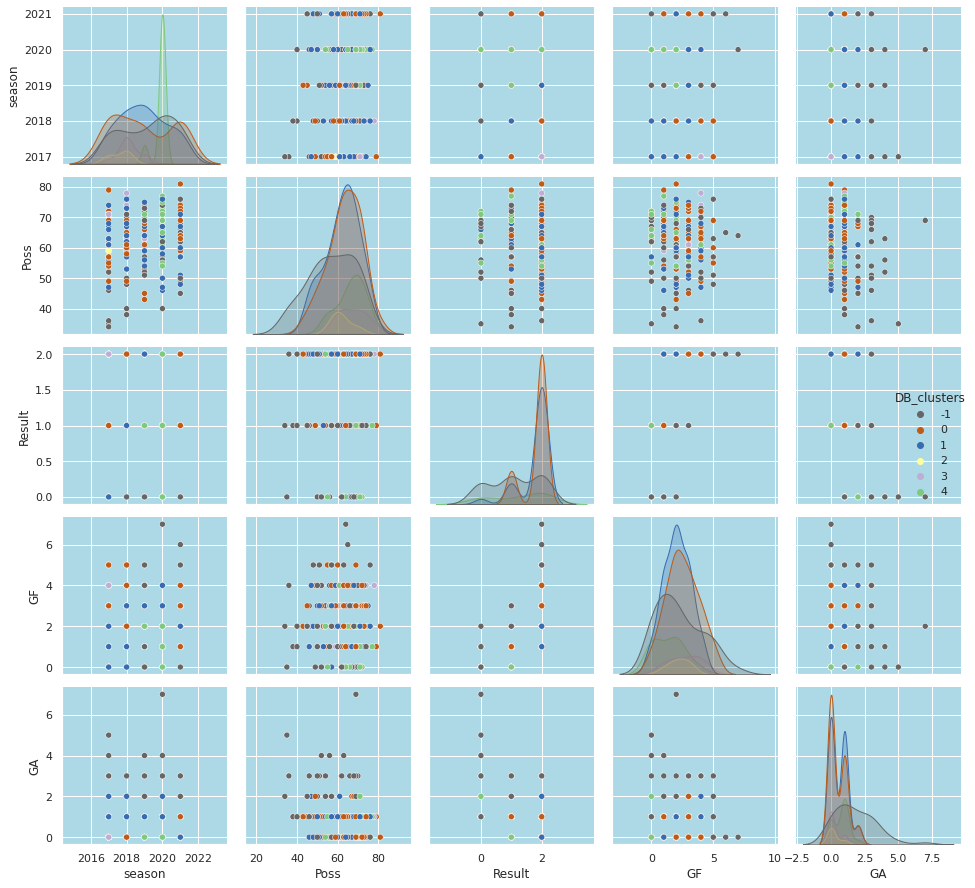

In [153]:
# To plot the clusterting distribution of all the important features
sns.pairplot(data=data_copy, x_vars=['season','Poss','Result','GF','GA'],
             y_vars=['season','Poss','Result','GF','GA'], hue='DB_clusters', 
             palette='Accent_r')
save_fig("02_DB_cluster")

Let us determine the common qualities that players share with each cluster in DBSCAN Clustering using the pairplot above:

Cluster 0 traits:
- Players in this cluster have played most of the seasons
- Players in this cluster had possession of the ball between 40% and 80% of the time during the matches
- Players in this cluster won or drew all of their matches as a team 
- Players in this cluster were able to score an average 2 or 3 goals as a team in most of the matches
- Players in this cluster conceded an average 1 goal as a team in most of the matches

Cluster 1 traits:
- Players in this cluster have played most of the seasons
- Players in this cluster had possession of the ball between 45% and 75% of the time during the matches
- Players in this cluster won their matches most of the time but loses and draw sometimes too
- Players in this cluster were able to score an average between 1 and 3 goals as a team in most of the matches
- Players in this cluster conceded an average 1 goal as a team in most of the matches

Cluster 2 traits:
- Only 5 instances or players are included in this cluster
- Players in this cluster have played seasons before 2019
- Players in this cluster had possession of the ball between 50% and 75% of the time during the matches
- Players in this cluster won and drew their matches most of the time 
- Players in this cluster were able to score an average between 1 and 3 goals as a team in most of the matches
- Players in this cluster conceded an average 1 goal as a team in most of the matches

Cluster 3 traits:
- Only 9 instances or players are included in this cluster
- Players in this cluster have played seasons before 2019
- Players in this cluster had possession of the ball between 50% and 80% of the time during the matches
- Players in this cluster won their matches most of the time
- Players in this cluster were able to score an average between 2 and 4 goals as a team in most of the matches
- Players in this cluster conceded an average 1 goal as a team in most of the matches

Cluster 4 traits:
- Players in this cluster have played most of the seasons
- Players in this cluster had possession of the ball between 50% and 80% of the time during the matches
- Players in this cluster won, drew and lost their matches almost equally
- Players in this cluster were able to score an average between 0 and 2 goals as a team in most of the matches
- Players in this cluster conceded an average 1 goal as a team in most of the matches

The value -1 above means that they don't fit into any clusters and can be thought of as an outlier. There were total of 48 outliers out of 190 instances.

In [79]:
# To export hierarchical clustering results
data_copy.to_csv('02_DBSCAN_Results.csv', index=False)

In [80]:
# Done DBSCAN

# Hierarchical Clustering
There are two types of hierarchical clustering: Divisive and Agglomerative. In divisive (top-down) clustering method, all observations are assigned to a single cluster and then that cluster is partitioned to two least similar clusters, and then those two clusters are partitioned again to multiple clusters, and thus the process go on. In agglomerative (bottom-up), the opposite approach is followed. Here, the ideal no. of clusters is decided by dendrogram.

Method-1: Dendrogram Plotting using Clustermap

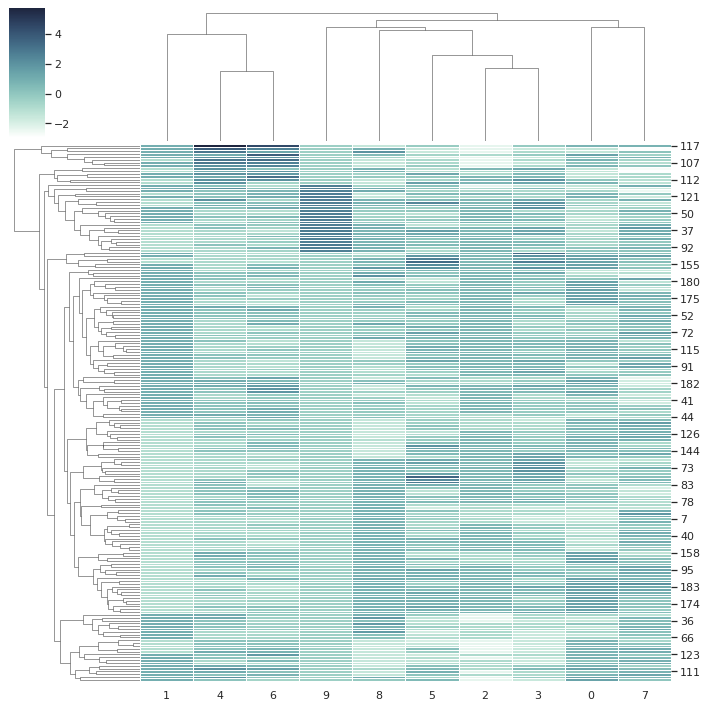

In [81]:
# To plot Dendrogram using clustermap
cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sns.clustermap(pca_scaled_data, cmap=cmap, linewidths=.5)

From above dendrogram, we can consider 2 clusters at minimum or 6 clusters at maximum. We will again cross-check the dendrogram using Ward's Method. Ward's method is an alternative to single-link clustering. This algorithm works for finding a partition with small sum of squares (to minimise the within-cluster-variance).

Method-2: Dendrogram Plotting using Ward's Method

Saving figure 02_Hier_Dendrogram


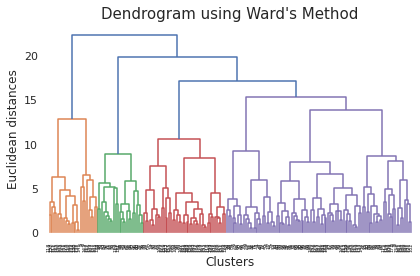

In [82]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
dendrogram = sch.dendrogram(sch.linkage(pca_scaled_data, method='ward'))
plt.title("Dendrogram using Ward's Method", fontsize=15)
plt.xlabel('Clusters', fontsize=12)
plt.ylabel('Euclidean distances', fontsize=12)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
save_fig("02_Hier_Dendrogram")
plt.show()

We can see 4 prominent clusters here (orange, green, red, violet). We will now follow the similar process of labelling data with cluster ids, then visualize the 4 clusters using various feature pairs, and finally we will export the results to a .csv file.

In [83]:
# To train the model using Heirarchical clustering
from sklearn.cluster import AgglomerativeClustering

hier_clust = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
Y_hc = hier_clust.fit_predict(pca_scaled_data)

In [84]:
# To check the labelled clusters
Y_hc

array([0, 0, 3, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 3, 0, 2,
       0, 2, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 3, 0, 0, 0, 0, 3, 0, 3, 1, 3, 1, 3, 1, 3, 0,
       1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 3, 2, 3, 1, 3, 1, 3, 3, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 3, 0, 1, 3, 0, 0, 0, 3, 0, 3,
       0, 3, 3, 1, 0, 3, 3, 0, 1, 3, 3, 0, 0, 3, 3, 0, 1, 0, 3, 0, 3, 0,
       3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3])

In [85]:
# To check the counts of cluster
pd.Series(hier_clust.labels_).value_counts()

0    97
3    43
1    26
2    24
dtype: int64

In [86]:
# save the cluster labels
data_hc = new_score_data.copy()
data_hc = data_hc.drop('KM_Clusters', axis=1)
data_hc['Hier_clusters'] = hier_clust.labels_
data_hc.head()

,season,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Hier_clusters
0,2017,12-08-2017,12:30,Matchweek 1,Sat,1,1,3,3,Watford,3.1,2.1,54,20407.0,Jordan Henderson,433,Anthony Taylor,0
1,2017,19-08-2017,15:00,Matchweek 2,Sat,0,2,1,0,Crystal Palace,2.4,0.6,71,53138.0,Jordan Henderson,433,Kevin Friend,0
2,2017,27-08-2017,16:00,Matchweek 3,Sun,0,2,4,0,Arsenal,3.0,0.7,49,53206.0,Jordan Henderson,433,Craig Pawson,3
3,2017,09-09-2017,12:30,Matchweek 4,Sat,1,0,0,5,Manchester City,0.7,2.7,35,54172.0,Jordan Henderson,433,Jonathan Moss,1
4,2017,16-09-2017,15:00,Matchweek 5,Sat,0,1,1,1,Burnley,2.1,0.6,72,53231.0,James Milner,433,Roger East,0


Saving figure 02_Hierar_cluster


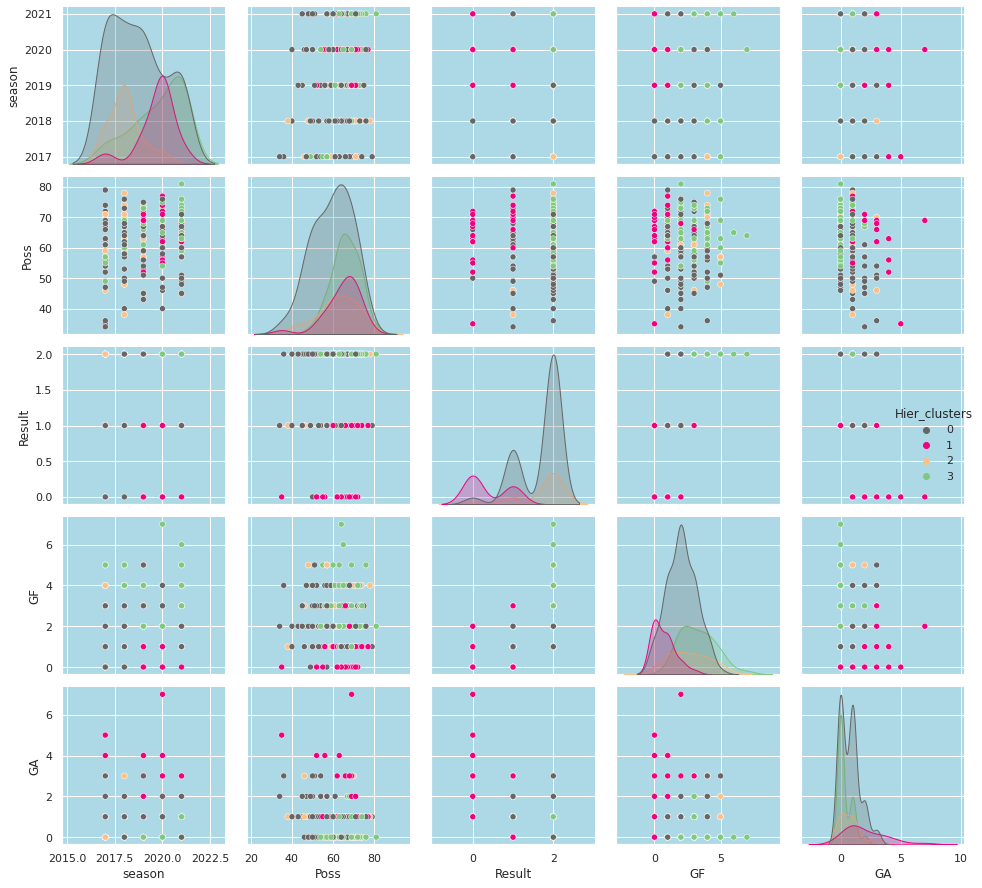

In [190]:
# To plot the clusterting distribution of all the important features
sns.pairplot(data=data_hc, x_vars=['season','Poss','Result','GF','GA'],
             y_vars=['season','Poss','Result','GF','GA'], hue='Hier_clusters', 
             palette='Accent_r')
save_fig("02_Hierar_cluster")

Let us determine the common qualities that players share with each cluster in Hierarchical Clustering using the pairplot above:

Cluster 0 traits:
- Players in this cluster have played most of the seasons
- Players in this cluster had possession of the ball between 35% and 80% of the time during the matches
- Players in this cluster won most of the matches and drew few times as a team 
- Players in this cluster were able to score an average 2 or 3 goals as a team in most of the matches
- Players in this cluster conceded an average 1 goal as a team in most of the matches

Cluster 1 traits:
- Most players in this cluster have played seasons after 2018
- Players in this cluster had possession of the ball between 35% and 80% of the time during the matches
- Players in this cluster either lost or drew their matches most of the time
- Players in this cluster were able to score an average 1 goal as a team in most of the matches
- Players in this cluster conceded an average 1 or 2 goal as a team in most of the matches

Cluster 2 traits:
- Players in this cluster have played seasons before 2019
- Players in this cluster had possession of the ball between 40% and 80% of the time during the matches
- Players in this cluster won their matches most of the time 
- Players in this cluster were able to score an average between 1 and 3 goals as a team in most of the matches
- Players in this cluster conceded an average 0 or 1 goal as a team in most of the matches

Cluster 3 traits:
- Most players in this cluster have played seasons after 2018
- Players in this cluster had possession of the ball between 55% and 80% of the time during the matches
- Players in this cluster won their matches almost everytime
- Players in this cluster were able to score an average between 2 and 4 goals as a team in most of the matches
- Players in this cluster conceded an average 0 or 1 goals as a team in most of the matches

In [194]:
# To export hierarchical clustering results
data_hc.to_csv('02_Hierchical_Results.csv', index=False)